In [1]:
#Rebuild NEURON-based Cell
import numpy as np
from neuron import h
import simulation as sim
import matplotlib.pyplot as plt
import stimulus_pulse as sp
import extracellular as ex
import helperFuncs as hf

for sec in h.allsec():
   h.delete_section(sec=sec)

--No graphics will be displayed.


In [2]:
RGC = sim.Local_Cell()
filename = 'cell_param_files/params_35_v2.csv'
axon_coords = RGC.build_cell(filename, 'mammalian_spike_35')
# RGC.shift_cell_x_y_z(0+x_shift,0,0)

After any change to cell geometry or nseg, be sure to invoke setpointers()
[[-0.01194     0.          0.02      ]
 [-0.01227408  0.          0.02094255]
 [-0.01275496  0.          0.02181933]
 ...
 [-3.05527043  0.          0.03994091]
 [-3.05627043  0.          0.03994091]
 [-3.05727043  0.          0.03994091]]


# Convert to SWC

In [3]:
from hoc2swc import neuron2swc

neuron2swc("n_rgc.swc")

Wrote cell 0 to n_rgc.swc


# Simplify and Clean the SWC File

In [4]:
import jaxley as jx
from jaxley.morphology import morph_delete, morph_connect
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

ModuleNotFoundError: No module named 'jaxley'

In [5]:
cell = jx.read_swc(
    "n_rgc.swc", 
    ncomp = 20, 
    min_radius= 0.005,
    assign_groups=True)




In [6]:
cell.show()


,local_comp_index,global_comp_index,local_branch_index,global_branch_index,local_cell_index,global_cell_index
0,0,0,0,0,0,0
1,1,1,0,0,0,0
2,2,2,0,0,0,0
3,3,3,0,0,0,0
4,4,4,0,0,0,0
...,...,...,...,...,...,...
2415,15,2415,120,120,0,0
2416,16,2416,120,120,0,0
2417,17,2417,120,120,0,0
2418,18,2418,120,120,0,0


# Visualize

In [7]:
params = pd.read_csv('cell_param_files/params_35_v2.csv')
mod_file = 'mammalian_spike_35'
print(axon_coords)
offset = 0

[[-0.01194     0.          0.02      ]
 [-0.01227408  0.          0.02094255]
 [-0.01275496  0.          0.02181933]
 ...
 [-3.05527043  0.          0.03994091]
 [-3.05627043  0.          0.03994091]
 [-3.05727043  0.          0.03994091]]


# Build Biophysics For Dendrites

# Build Biophysics For Soma


# Build Biophysics For Axon Hillcock


# Build Morphology For Axon Hillcock



In [8]:
from morphology_generators.axon_hillcock import build_Axon_Hillcock
ah_params = params.iloc[2]
ah_length = int(ah_params['length'])
print(type(ah_length))
ah_diameter = float(ah_params['diameter'])

builder = build_Axon_Hillcock(axon_coords, ah_length, ah_diameter)
ah = builder.create_branch()
offset += ah_length


<class 'int'>


# Build Biophysics For SOCB


# Build Morphology For SOCB


In [9]:
from morphology_generators.socb import SOCB_Build
socb_params = params.iloc[3]
socb_length = int(socb_params['length'])
# socb_diameter = float(socb_params['diameter'])
nr_params = params.iloc[4]
nr_diameter = float(nr_params['diameter'])

scaling_factor = (ah_diameter - nr_diameter)/socb_length

builder = SOCB_Build(axon_coords, socb_length, ah_diameter, offset, scaling_factor)
socb = builder.create_branch()
offset += socb_length

(41,)
(41, 3)
     n  type          x    y          z        r  parent
0    0     2 -47.515447  0.0  35.235989  2.00000      -1
1    1     2 -48.501605  0.0  35.401800  1.96875       0
2    2     2 -49.488462  0.0  35.563397  1.93750       1
3    3     2 -50.475980  0.0  35.720902  1.90625       2
4    4     2 -51.464124  0.0  35.874431  1.87500       3
5    5     2 -52.452861  0.0  36.024092  1.84375       4
6    6     2 -53.442161  0.0  36.169988  1.81250       5
7    7     2 -54.431995  0.0  36.312213  1.78125       6
8    8     2 -55.422337  0.0  36.450860  1.75000       7
9    9     2 -56.413162  0.0  36.586012  1.71875       8
10  10     2 -57.404447  0.0  36.717750  1.68750       9
11  11     2 -58.396169  0.0  36.846150  1.65625      10
12  12     2 -59.388309  0.0  36.971284  1.62500      11
13  13     2 -60.380847  0.0  37.093221  1.59375      12
14  14     2 -61.373765  0.0  37.212024  1.56250      13
15  15     2 -62.367045  0.0  37.327756  1.53125      14
16  16     2 -63.

# Build Biophysics For NR


# Build Morphology For NR


In [10]:
from morphology_generators.nr import NR_Build

nr_params = params.iloc[4]
nr_diameter = float(nr_params['diameter'])
nr_length = int(nr_params['length'])



builder = NR_Build(axon_coords, nr_length, nr_diameter, offset)
nr = builder.create_branch()
offset += nr_length

# Build Biophysics For Distal Axon


# Build Morphology For Distal Axon


In [11]:
from morphology_generators.distal_axon import DA_Build

da_params = params.iloc[5]
da_diameter = float(da_params['diameter'])
da_length = int(da_params['length'])



builder = DA_Build(axon_coords, da_length, da_diameter, offset)
da = builder.create_branch()

/Users/andrewlanpouthakoun/anaconda3/envs/stats220/lib/python3.13/site-packages/jaxley/modules/network.py:153: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self._branchpoints = pd.concat(self._branchpoints)


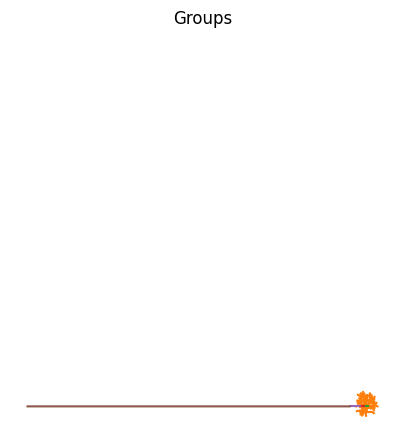

In [12]:
cell.initialize()     # or cell.compute_xyz(); cell.set_ncomp(); …
ah.initialize() 
socb.initialize()
nr.initialize()
da.initialize() 
net = jx.Network([cell, ah, socb, nr, da])
net.cell(0).add_to_group("original")
net.cell(1).add_to_group("ah")
net.cell(2).add_to_group("socb")
net.cell(3).add_to_group("nr")
net.cell(4).add_to_group("da")
net.compute_xyz()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
colors = plt.cm.tab10.colors
# net.original.vis(ax=ax, color=colors[2])
net.original.vis(ax=ax, color=colors[1])
net.ah.vis(ax=ax, color=colors[2])
net.socb.vis(ax=ax, color=colors[3])
net.nr.vis(ax=ax, color=colors[4])
net.da.vis(ax=ax, color=colors[5])
# cell.axon.vis(ax=ax, color=colors[0])

plt.axis("off")
plt.title("Groups")
plt.axis("square")
plt.show()

# Plot in 3D

/Users/andrewlanpouthakoun/anaconda3/envs/stats220/lib/python3.13/site-packages/jaxley/utils/plot_utils.py:443: UserWarning: rendering large morphologies in 3D can take a while. Consider projecting to 2D instead.
  warn(
/Users/andrewlanpouthakoun/anaconda3/envs/stats220/lib/python3.13/site-packages/jaxley/utils/plot_utils.py:285: RuntimeWarning: invalid value encountered in divide
  orientation = orientation / np.linalg.norm(orientation)


original done


/Users/andrewlanpouthakoun/anaconda3/envs/stats220/lib/python3.13/site-packages/jaxley/utils/plot_utils.py:443: UserWarning: rendering large morphologies in 3D can take a while. Consider projecting to 2D instead.
  warn(
/Users/andrewlanpouthakoun/anaconda3/envs/stats220/lib/python3.13/site-packages/jaxley/utils/plot_utils.py:285: RuntimeWarning: invalid value encountered in divide
  orientation = orientation / np.linalg.norm(orientation)
/Users/andrewlanpouthakoun/anaconda3/envs/stats220/lib/python3.13/site-packages/jaxley/utils/plot_utils.py:443: UserWarning: rendering large morphologies in 3D can take a while. Consider projecting to 2D instead.
  warn(
/Users/andrewlanpouthakoun/anaconda3/envs/stats220/lib/python3.13/site-packages/jaxley/utils/plot_utils.py:285: RuntimeWarning: invalid value encountered in divide
  orientation = orientation / np.linalg.norm(orientation)
/Users/andrewlanpouthakoun/anaconda3/envs/stats220/lib/python3.13/site-packages/jaxley/utils/plot_utils.py:443: Us

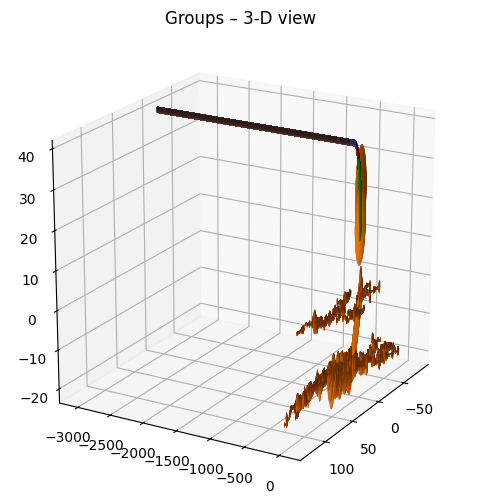

In [14]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D      # noqa: F401 (just activates 3-D)
fig  = plt.figure(figsize=(6, 6))
ax   = fig.add_subplot(111, projection="3d")

# — choose which dimensions to map to X-, Y-, Z-axes —
dims = [1, 0, 2]          # Z-, X-, Y-  (same order the docs use)

net.original.vis(ax=ax, type="morph", dims=dims, color=colors[1])
print("original done")
net.ah.vis(      ax=ax, type="morph", dims=dims, color=colors[2])
net.socb.vis(    ax=ax, type="morph", dims=dims, color=colors[3])
net.nr.vis(      ax=ax, type="morph", dims=dims, color=colors[4])
net.da.vis(      ax=ax, type="morph", dims=dims, color=colors[5])

print()
ax.set_box_aspect([1, 1, 1])       # equal XYZ scaling
ax.view_init(elev=20, azim=30)     # nice starting angle
plt.title("Groups – 3-D view")
plt.show()

# fig  = plt.figure(figsize=(6, 6))
# ax   = fig.add_subplot(111, projection="3d")
# net.vis(ax=ax, type="morph", dims=[0,1])
# plt.show()
